# LIVER SERIES - Part 1

This notebook features different statistical methods to answer some questions about our dataset. The dataset is from the Mayo Clinic clinical trial in primary liver cirrhosis that was conducted between 1974 and 1984. For further reading, please refer to: T Therneau and P Grambsch (2000), Modeling Survival Data: Extending the Cox Model, Springer-Verlag, New York. ISBN: 0-387-98784-3.

In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# What does our dataset look like?

In [2]:
pbc = pd.read_csv('primary biliary cirrhosis RCT mod1.csv')
pbc.head()

,PatientID,DaySurvival,Status,Treatment,AgeYrs,Sex,Ascites,Hepatomegaly,SpiderAngiomata,Edema,Bilirubin,Cholesterol,Albumin,Copper,ALP,AST,Triglyceride,Platelet,Protime,HistologyStage
0,1,400,censored,penicillamine,58.77,F,yes,yes,yes,present,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,dead,penicillamine,56.45,F,no,yes,yes,absent,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,censored,penicillamine,70.07,M,no,no,no,diurese,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,censored,penicillamine,54.74,F,no,yes,yes,diurese,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,transplant,placebo,38.11,F,no,yes,yes,absent,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [3]:
pbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PatientID        418 non-null    int64  
 1   DaySurvival      418 non-null    int64  
 2   Status           418 non-null    object 
 3   Treatment        312 non-null    object 
 4   AgeYrs           418 non-null    float64
 5   Sex              418 non-null    object 
 6   Ascites          312 non-null    object 
 7   Hepatomegaly     312 non-null    object 
 8   SpiderAngiomata  312 non-null    object 
 9   Edema            418 non-null    object 
 10  Bilirubin        418 non-null    float64
 11  Cholesterol      284 non-null    float64
 12  Albumin          418 non-null    float64
 13  Copper           310 non-null    float64
 14  ALP              312 non-null    float64
 15  AST              312 non-null    float64
 16  Triglyceride     282 non-null    float64
 17  Platelet        

# What kind of variables does the dataset have?

Our dataset has:
* 418 observations/patients
* 20 variables<br>


Of the 20 variables:
* 7 are categorical (as object)
* 13 are numeric:
  * 2 are integers
  * 11 are floats

# What are the variables and what do they represent?
* PatientID = the designated identification reference of the patient
* DaySurvival = the number of days between when the patient joined the study up to the time when they died or had liver transplant
* Status = the event that happened to the patient in the study: died, had a transplant, or lost to follow up (censored)
* Treatment = the type of treatment the patient received: D-penicillamine, placebo
* AgeYrs = the age of the patient when they enrolled in the study
* Sex = female/male
* Ascites = presence or absence of abnormal build-up of fluid in the abdomen
* Hepatomegaly = presence or absence of liver enlargement
* SpiderAngiomata = presence or absence of abnormally swollen blooc vessels in the skin surface
* Edema = presence or absence of swelling, or if it had swelling but diuresis was done
* Bilirubin = measurement of serum bilirubin in mg/dL
* Cholesterol = measurement of serum cholesterol in mg/dL
* Albumin = measurement of serum albumin in g/dL
* Copper = measurement of urinary copper in $\mu$g/day
* ALP = measurement of serum alkaline phosphatase in U/L
* AST = measurement of serum aspartate aminotransferase in U/mL
* Triglyceride = measurement of serum triglyceride in mg/dL
* Platelet = platelet count per $\mu$L
* Protime = standardised blood clotting time in seconds
* HistologyStage = histologic stage of the disease


# How many null values does our dataset have?

In [4]:
pbc.isna().sum()

PatientID            0
DaySurvival          0
Status               0
Treatment          106
AgeYrs               0
Sex                  0
Ascites            106
Hepatomegaly       106
SpiderAngiomata    106
Edema                0
Bilirubin            0
Cholesterol        134
Albumin              0
Copper             108
ALP                106
AST                106
Triglyceride       136
Platelet            11
Protime              2
HistologyStage       6
dtype: int64

We will drop the null values that coincides with the columns: Treatment, Ascites, Hepatomegaly, SpiderAngiomata, ALP, and AST. Total of 106 null values.

# Clearing the null values

In [5]:
pbc = pbc.dropna(subset=['Treatment'])
pbc.tail()

,PatientID,DaySurvival,Status,Treatment,AgeYrs,Sex,Ascites,Hepatomegaly,SpiderAngiomata,Edema,Bilirubin,Cholesterol,Albumin,Copper,ALP,AST,Triglyceride,Platelet,Protime,HistologyStage
307,308,1153,dead,penicillamine,61.18,F,no,yes,no,absent,0.4,246.0,3.58,24.0,797.0,91.0,113.0,288.0,10.4,2.0
308,309,994,dead,placebo,58.30,F,no,no,no,absent,0.4,260.0,2.75,41.0,1166.0,70.0,82.0,231.0,10.8,2.0
309,310,939,dead,penicillamine,62.33,F,no,no,no,absent,1.7,434.0,3.35,39.0,1713.0,171.0,100.0,234.0,10.2,2.0
310,311,839,dead,penicillamine,38.00,F,no,no,no,absent,2.0,247.0,3.16,69.0,1050.0,117.0,88.0,335.0,10.5,2.0
311,312,788,dead,placebo,33.15,F,no,no,yes,absent,6.4,576.0,3.79,186.0,2115.0,136.0,149.0,200.0,10.8,2.0


We are left with 312 patients/observations.<br>
Are there still null values that remain?

In [6]:
pbc.isna().sum()

PatientID           0
DaySurvival         0
Status              0
Treatment           0
AgeYrs              0
Sex                 0
Ascites             0
Hepatomegaly        0
SpiderAngiomata     0
Edema               0
Bilirubin           0
Cholesterol        28
Albumin             0
Copper              2
ALP                 0
AST                 0
Triglyceride       30
Platelet            4
Protime             0
HistologyStage      0
dtype: int64

There are still null values in the columns: Cholesterol, Copper, Triglyceride, and Platelet.<br>
We will replace these null values with the average values of their respective columns.

In [7]:
pbc['Cholesterol'].fillna(value=pbc['Cholesterol'].mean(), inplace=True)
pbc['Copper'].fillna(value=pbc['Copper'].mean(), inplace=True)
pbc['Triglyceride'].fillna(value=pbc['Triglyceride'].mean(), inplace=True)
pbc['Platelet'].fillna(value=pbc['Platelet'].mean(), inplace=True)

Do we still have null values?

In [8]:
pbc.isna().sum()

PatientID          0
DaySurvival        0
Status             0
Treatment          0
AgeYrs             0
Sex                0
Ascites            0
Hepatomegaly       0
SpiderAngiomata    0
Edema              0
Bilirubin          0
Cholesterol        0
Albumin            0
Copper             0
ALP                0
AST                0
Triglyceride       0
Platelet           0
Protime            0
HistologyStage     0
dtype: int64

# What does our new dataset look like?

In [9]:
pbc

,PatientID,DaySurvival,Status,Treatment,AgeYrs,Sex,Ascites,Hepatomegaly,SpiderAngiomata,Edema,Bilirubin,Cholesterol,Albumin,Copper,ALP,AST,Triglyceride,Platelet,Protime,HistologyStage
0,1,400,censored,penicillamine,58.77,F,yes,yes,yes,present,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,dead,penicillamine,56.45,F,no,yes,yes,absent,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,censored,penicillamine,70.07,M,no,no,no,diurese,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,censored,penicillamine,54.74,F,no,yes,yes,diurese,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,transplant,placebo,38.11,F,no,yes,yes,absent,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,dead,penicillamine,61.18,F,no,yes,no,absent,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,309,994,dead,placebo,58.30,F,no,no,no,absent,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,310,939,dead,penicillamine,62.33,F,no,no,no,absent,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,311,839,dead,penicillamine,38.00,F,no,no,no,absent,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


# What is the descriptive summary statistics of our new dataset?

In [10]:
pbc.describe()

,PatientID,DaySurvival,AgeYrs,Bilirubin,Cholesterol,Albumin,Copper,ALP,AST,Triglyceride,Platelet,Protime,HistologyStage
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,156.500000,2006.362179,50.018814,3.256090,369.510563,3.520000,97.648387,1982.655769,122.556346,124.702128,261.935065,10.725641,3.032051
std,90.210864,1123.280843,10.581300,4.530315,221.257085,0.419892,85.338190,2140.388824,56.699525,61.926753,94.991905,1.004323,0.877880
min,1.000000,41.000000,26.280000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,78.750000,1191.000000,42.242500,0.800000,255.750000,3.310000,41.750000,871.500000,80.600000,87.000000,200.000000,10.000000,2.000000
50%,156.500000,1839.500000,49.795000,1.350000,322.000000,3.550000,73.000000,1259.000000,114.700000,114.000000,258.500000,10.600000,3.000000
75%,234.250000,2697.250000,56.717500,3.425000,392.250000,3.800000,123.000000,1980.000000,151.900000,145.250000,322.000000,11.100000,4.000000
max,312.000000,4556.000000,78.440000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,17.100000,4.000000


# How does the variable **DaySurvival** look like?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


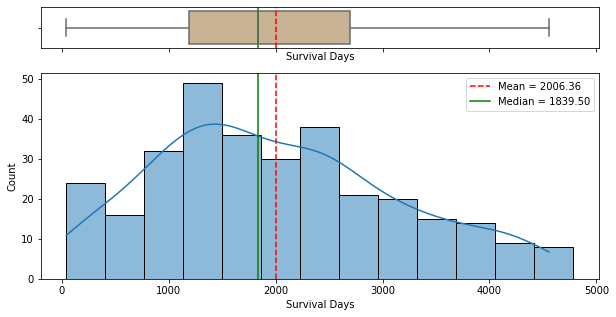

In [11]:
f, (ax_box, ax_hist) = plt.subplots(2, figsize=(10,5), sharex=True, 
                                    gridspec_kw={"height_ratios": (0.2, 1)}) 

mean=pbc['DaySurvival'].mean()
median=pbc['DaySurvival'].median()

sns.boxplot(pbc['DaySurvival'], ax=ax_box, color='tan')
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.histplot(pbc['DaySurvival'], kde=True, ax=ax_hist, binwidth=365)
ax_hist.axvline(mean, color='r', linestyle='--', label='Mean = '+ str('%.2f' % mean))
ax_hist.axvline(median, color='g', linestyle='-', label='Median = '+ str('%.2f' % median))

ax_box.set(xlabel='Survival Days')
ax_hist.set(xlabel='Survival Days')

plt.legend()
plt.show()

# How does the variable **AgeYrs** look like?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


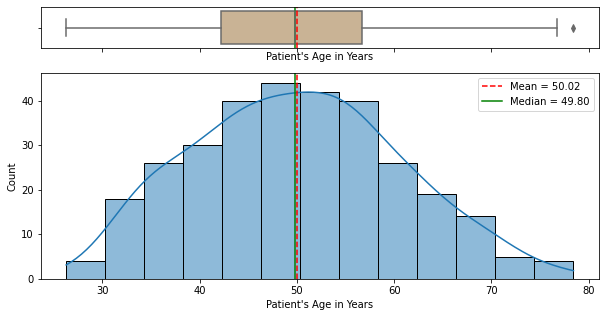

In [38]:
f, (ax_box, ax_hist) = plt.subplots(2, figsize=(10,5), sharex=True, 
                                    gridspec_kw={"height_ratios": (0.2, 1)})

mean=pbc['AgeYrs'].mean()
median=pbc['AgeYrs'].median()

sns.boxplot(pbc['AgeYrs'], ax=ax_box, color='tan')
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.histplot(pbc['AgeYrs'], kde=True, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--', label='Mean = '+ str('%.2f' % mean))
ax_hist.axvline(median, color='g', linestyle='-', label='Median = '+ str('%.2f' % median))

ax_box.set(xlabel="Patient's Age in Years")
ax_hist.set(xlabel="Patient's Age in Years")

plt.legend()
plt.show()

# How does the variable **Bilirubin** look like?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


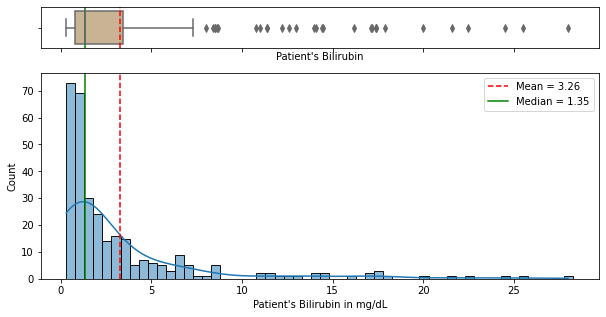

In [13]:
f, (ax_box, ax_hist) = plt.subplots(2, figsize=(10,5), sharex=True, 
                                    gridspec_kw={"height_ratios": (0.2, 1)})

mean=pbc['Bilirubin'].mean()
median=pbc['Bilirubin'].median()

sns.boxplot(pbc['Bilirubin'], ax=ax_box, color='tan')
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.histplot(pbc['Bilirubin'], kde=True, ax=ax_hist, binwidth=0.5)
ax_hist.axvline(mean, color='r', linestyle='--', label='Mean = '+ str('%.2f' % mean))
ax_hist.axvline(median, color='g', linestyle='-', label='Median = '+ str('%.2f' % median))

ax_box.set(xlabel="Patient's Bilirubin")
ax_hist.set(xlabel="Patient's Bilirubin in mg/dL")

plt.legend()
plt.show()

# How does the variable **Cholesterol** look like?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


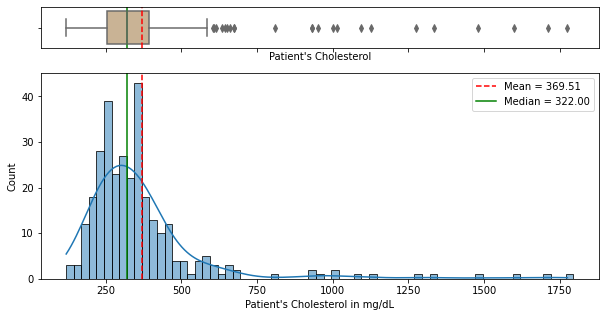

In [14]:
f, (ax_box, ax_hist) = plt.subplots(2, figsize=(10,5), sharex=True, 
                                    gridspec_kw={"height_ratios": (0.2, 1)})

mean=pbc['Cholesterol'].mean()
median=pbc['Cholesterol'].median()

sns.boxplot(pbc['Cholesterol'], ax=ax_box, color='tan')
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.histplot(pbc['Cholesterol'], kde=True, ax=ax_hist, binwidth=25)
ax_hist.axvline(mean, color='r', linestyle='--', label='Mean = '+ str('%.2f' % mean))
ax_hist.axvline(median, color='g', linestyle='-', label='Median = '+ str('%.2f' % median))

ax_box.set(xlabel="Patient's Cholesterol")
ax_hist.set(xlabel="Patient's Cholesterol in mg/dL")

plt.legend()
plt.show()

# How does the variable **Albumin** look like?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


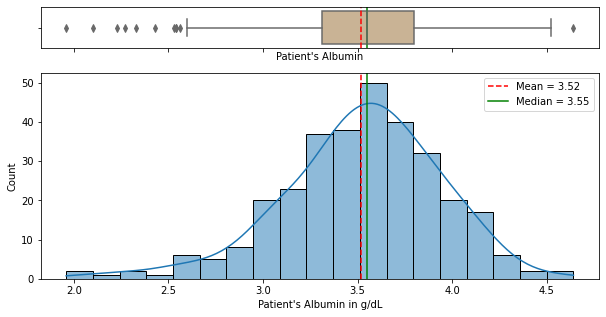

In [15]:
f, (ax_box, ax_hist) = plt.subplots(2, figsize=(10,5), sharex=True, 
                                    gridspec_kw={"height_ratios": (0.2, 1)})

mean=pbc['Albumin'].mean()
median=pbc['Albumin'].median()

sns.boxplot(pbc['Albumin'], ax=ax_box, color='tan')
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.histplot(pbc['Albumin'], kde=True, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--', label='Mean = '+ str('%.2f' % mean))
ax_hist.axvline(median, color='g', linestyle='-', label='Median = '+ str('%.2f' % median))

ax_box.set(xlabel="Patient's Albumin")
ax_hist.set(xlabel="Patient's Albumin in g/dL")

plt.legend()
plt.show()

# How does the variable **Copper** look like?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


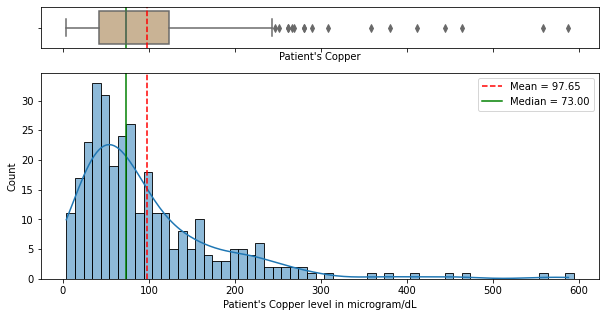

In [16]:
f, (ax_box, ax_hist) = plt.subplots(2, figsize=(10,5), sharex=True, 
                                    gridspec_kw={"height_ratios": (0.2, 1)})

mean=pbc['Copper'].mean()
median=pbc['Copper'].median()

sns.boxplot(pbc['Copper'], ax=ax_box, color='tan')
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.histplot(pbc['Copper'], kde=True, ax=ax_hist, binwidth=10)
ax_hist.axvline(mean, color='r', linestyle='--', label='Mean = '+ str('%.2f' % mean))
ax_hist.axvline(median, color='g', linestyle='-', label='Median = '+ str('%.2f' % median))

ax_box.set(xlabel="Patient's Copper")
ax_hist.set(xlabel="Patient's Copper level in microgram/dL")

plt.legend()
plt.show()

# How does the variable **ALP** look like?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


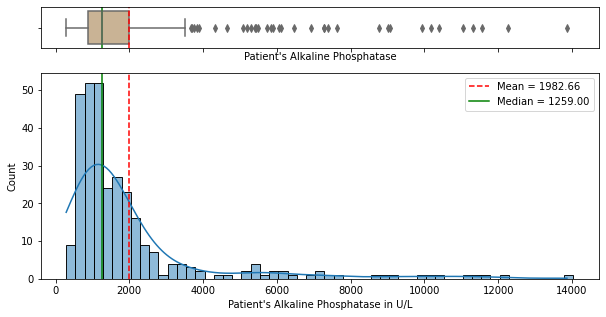

In [17]:
f, (ax_box, ax_hist) = plt.subplots(2, figsize=(10,5), sharex=True, 
                                    gridspec_kw={"height_ratios": (0.2, 1)})

mean=pbc['ALP'].mean()
median=pbc['ALP'].median()

sns.boxplot(pbc['ALP'], ax=ax_box, color='tan')
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.histplot(pbc['ALP'], kde=True, ax=ax_hist, binwidth=250)
ax_hist.axvline(mean, color='r', linestyle='--', label='Mean = '+ str('%.2f' % mean))
ax_hist.axvline(median, color='g', linestyle='-', label='Median = '+ str('%.2f' % median))

ax_box.set(xlabel="Patient's Alkaline Phosphatase")
ax_hist.set(xlabel="Patient's Alkaline Phosphatase in U/L")

plt.legend()
plt.show()

# How does the variable **AST** look like?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


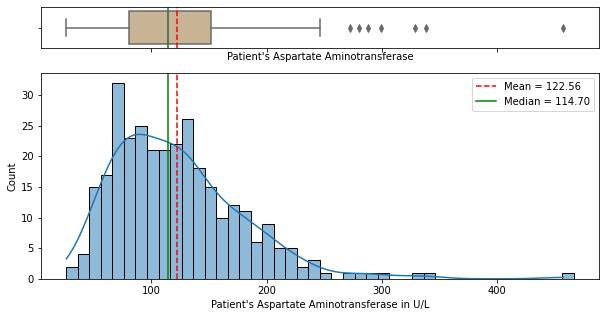

In [18]:
f, (ax_box, ax_hist) = plt.subplots(2, figsize=(10,5), sharex=True, 
                                    gridspec_kw={"height_ratios": (0.2, 1)})

mean=pbc['AST'].mean()
median=pbc['AST'].median()

sns.boxplot(pbc['AST'], ax=ax_box, color='tan')
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.histplot(pbc['AST'], kde=True, ax=ax_hist, binwidth=10)
ax_hist.axvline(mean, color='r', linestyle='--', label='Mean = '+ str('%.2f' % mean))
ax_hist.axvline(median, color='g', linestyle='-', label='Median = '+ str('%.2f' % median))

ax_box.set(xlabel="Patient's Aspartate Aminotransferase")
ax_hist.set(xlabel="Patient's Aspartate Aminotransferase in U/L")

plt.legend()
plt.show()

# How does the variable **Triglyceride** look like?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


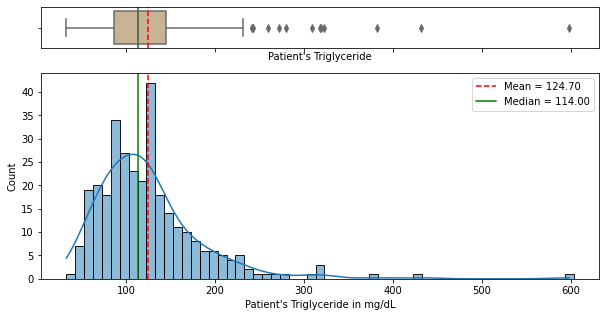

In [19]:
f, (ax_box, ax_hist) = plt.subplots(2, figsize=(10,5), sharex=True, 
                                    gridspec_kw={"height_ratios": (0.2, 1)})

mean=pbc['Triglyceride'].mean()
median=pbc['Triglyceride'].median()

sns.boxplot(pbc['Triglyceride'], ax=ax_box, color='tan')
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.histplot(pbc['Triglyceride'], kde=True, ax=ax_hist, binwidth=10)
ax_hist.axvline(mean, color='r', linestyle='--', label='Mean = '+ str('%.2f' % mean))
ax_hist.axvline(median, color='g', linestyle='-', label='Median = '+ str('%.2f' % median))

ax_box.set(xlabel="Patient's Triglyceride")
ax_hist.set(xlabel="Patient's Triglyceride in mg/dL")

plt.legend()
plt.show()

# How does the variable **Platelet** look like?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


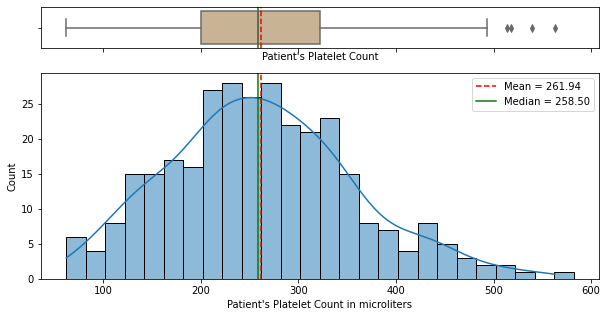

In [20]:
f, (ax_box, ax_hist) = plt.subplots(2, figsize=(10,5), sharex=True, 
                                    gridspec_kw={"height_ratios": (0.2, 1)})

mean=pbc['Platelet'].mean()
median=pbc['Platelet'].median()

sns.boxplot(pbc['Platelet'], ax=ax_box, color='tan')
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.histplot(pbc['Platelet'], kde=True, ax=ax_hist, binwidth=20)
ax_hist.axvline(mean, color='r', linestyle='--', label='Mean = '+ str('%.2f' % mean))
ax_hist.axvline(median, color='g', linestyle='-', label='Median = '+ str('%.2f' % median))

ax_box.set(xlabel="Patient's Platelet Count")
ax_hist.set(xlabel="Patient's Platelet Count in microliters")

plt.legend()
plt.show()

# How does the variable **Protime** look like?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


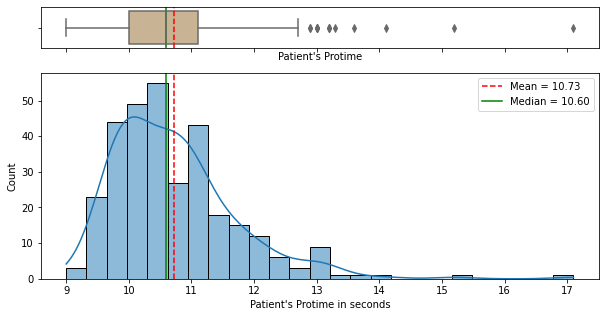

In [21]:
f, (ax_box, ax_hist) = plt.subplots(2, figsize=(10,5), sharex=True, 
                                    gridspec_kw={"height_ratios": (0.2, 1)})

mean=pbc['Protime'].mean()
median=pbc['Protime'].median()

sns.boxplot(pbc['Protime'], ax=ax_box, color='tan')
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.histplot(pbc['Protime'], kde=True, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--', label='Mean = '+ str('%.2f' % mean))
ax_hist.axvline(median, color='g', linestyle='-', label='Median = '+ str('%.2f' % median))

ax_box.set(xlabel="Patient's Protime")
ax_hist.set(xlabel="Patient's Protime in seconds")

plt.legend()
plt.show()

# What are the categories in the variable **Status**?

In [22]:
status = pd.DataFrame(pbc['Status'].value_counts())
status.reset_index(level=0, inplace=True)
status

,index,Status
0,dead,168
1,censored,125
2,transplant,19


Text(0.5, 0, 'Censoring Type')

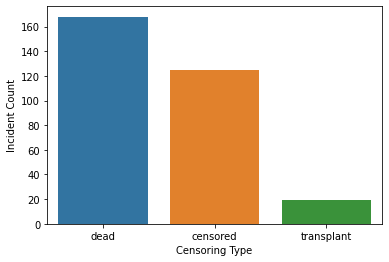

In [23]:
sns.barplot(x='index', y='Status', data=status)
plt.ylabel('Incident Count')
plt.xlabel('Censoring Type')

# What are the categories in the variable **Treatment**?

In [24]:
treat = pd.DataFrame(pbc['Treatment'].value_counts())
treat.reset_index(level=0, inplace=True)
treat

,index,Treatment
0,penicillamine,158
1,placebo,154


Text(0.5, 0, 'Treatment Group')

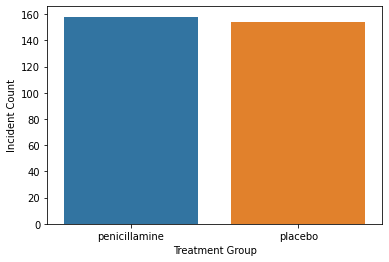

In [25]:
sns.barplot(x='index', y='Treatment', data=treat)
plt.ylabel('Incident Count')
plt.xlabel('Treatment Group')

# What are the categories in the variable **Sex**?

In [26]:
sex = pd.DataFrame(pbc['Sex'].value_counts())
sex.reset_index(level=0, inplace=True)
sex

,index,Sex
0,F,276
1,M,36


Text(0.5, 0, 'Sex')

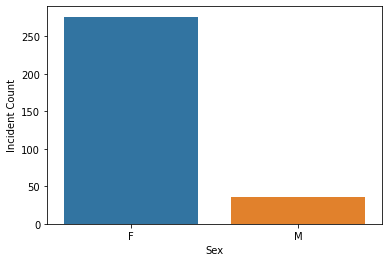

In [27]:
sns.barplot(x='index', y='Sex', data=sex)
plt.ylabel('Incident Count')
plt.xlabel('Sex')

# What are the categories in the variable **Ascites**?

In [28]:
ascites = pd.DataFrame(pbc['Ascites'].value_counts())
ascites.reset_index(level=0, inplace=True)
ascites

,index,Ascites
0,no,288
1,yes,24


Text(0.5, 0, 'Ascites Presence')

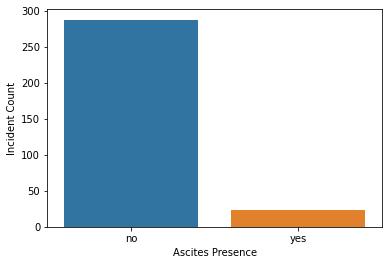

In [29]:
sns.barplot(x='index', y='Ascites', data=ascites)
plt.ylabel('Incident Count')
plt.xlabel('Ascites Presence')

# What are the categories in the variable **Hepatomegaly**?

In [30]:
hepato = pd.DataFrame(pbc['Hepatomegaly'].value_counts())
hepato.reset_index(level=0, inplace=True)
hepato

,index,Hepatomegaly
0,yes,160
1,no,152


Text(0.5, 0, 'Hepatomegaly Presence')

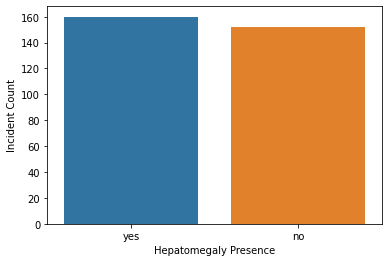

In [31]:
sns.barplot(x='index', y='Hepatomegaly', data=hepato)
plt.ylabel('Incident Count')
plt.xlabel('Hepatomegaly Presence')

# What are the categories in the variable **SpiderAngiomata**?

In [32]:
spider = pd.DataFrame(pbc['SpiderAngiomata'].value_counts())
spider.reset_index(level=0, inplace=True)
spider

,index,SpiderAngiomata
0,no,222
1,yes,90


Text(0.5, 0, 'Spider Angimata Presence')

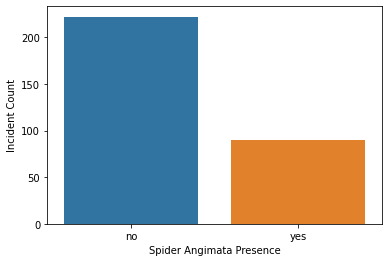

In [33]:
sns.barplot(x='index', y='SpiderAngiomata', data=spider)
plt.ylabel('Incident Count')
plt.xlabel('Spider Angimata Presence')

# What are the categories in the variable **Edema**?

In [34]:
edema = pd.DataFrame(pbc['Edema'].value_counts())
edema.reset_index(level=0, inplace=True)
edema

,index,Edema
0,absent,263
1,diurese,29
2,present,20


Text(0.5, 0, 'Edema Status')

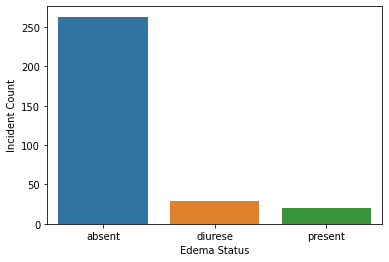

In [35]:
sns.barplot(x='index', y='Edema', data=edema)
plt.ylabel('Incident Count')
plt.xlabel('Edema Status')

# What are the categories in the variable **HistologyStage**?

In [36]:
histo = pd.DataFrame(pbc['HistologyStage'].value_counts())
histo.reset_index(level=0, inplace=True)
histo

,index,HistologyStage
0,3.0,120
1,4.0,109
2,2.0,67
3,1.0,16


Text(0.5, 0, 'Histology Staging')

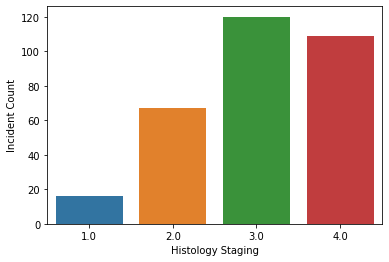

In [37]:
sns.barplot(x='index', y='HistologyStage', data=histo)
plt.ylabel('Incident Count')
plt.xlabel('Histology Staging')